 #  Project:- Flight Fare Prediction

## Objective:-
The objective of this project is to develop a predictive model that can estimate the cost of airfare.

##  This project can be useful for travelers, travel agencies, and airlines for various purposes, including:-
1.Travelers plan their trips on the basis of flight price on their budget \
2.Travel agencies and online booking platforms can analyze flight price trends \
3.Analyse which customer use which Airline most\
In summary, this model can solve problems related to cost-saving, budget planning, revenue optimization \
in the airline and travel industries benefiting both travelers and service providers.

## To achieve this objective, we have to do these following steps-

1.As first step, we load our FlightFare_Dataset from Project Directory, using Pandas read_excel method

2.Then, we perform Feature Exploration and Engineering to transform our dataset

3.Once done, we use a Feature Selection technique to select the most important features

4.At this point, we train our model in Linear Regression and Random Forest

## Import required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading Flight Data

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
train_data.shape

(10683, 11)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Note- All Feature is Categorical Except Output Feature Price

## Check for missing values

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

If there is NaN values exist then we can fill it or drop it.\
So,here only one-one NaN value in Route and Total-stops so we can drop it. 

In [6]:
train_data.dropna(inplace = True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.shape

(10682, 11)

## Feature Information


• Airline: Name of the Airline from which the Ticket is Booked.\
• Date_of_Journey: Date of Journey of the Traveller.\
• Source: Source from which the Airline Would Departure.\
• Destination: Destination to Which Airline Would Arrive.\
• Route: Route of the Airline from Source to Destination.\
• Dep_Time: Time at which Flight Would Departure from the Source.\
• Arrival_Time: Time at which Flight Would Arrive at the Destination.\
• Duration: Duration that Airline Takes to fly from Source to Destination.\
• Total_Stops: Total No of Stops that Airline takes Between Source and Destination.\
• Additional_Info: Any Additional Info about the Airline.\
• Price: Fare of the Ticket to fly from Source to Destination\

In [9]:
train_data.sample(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
478,Jet Airways,3/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
1870,Air India,9/04/2019,Banglore,Delhi,BLR → DEL,05:45,08:45,3h,non-stop,No info,4441
9390,IndiGo,21/04/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 22 Apr,2h 40m,non-stop,No info,4804
7007,SpiceJet,3/06/2019,Banglore,Delhi,BLR → DEL,09:30,12:20,2h 50m,non-stop,No info,3971
1860,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,08:15 10 May,15h 45m,1 stop,No info,13941
1832,Jet Airways,21/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,23:00,14h 5m,1 stop,In-flight meal not included,6992


## EDA

## Airline

Text(0.5, 1.0, 'Top 10 Aviation Companies whose flight tickets are sold the most')

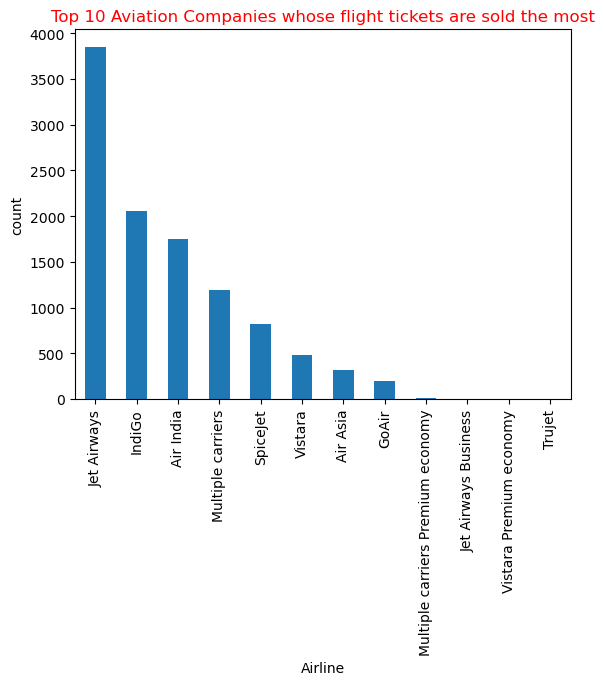

In [10]:
train_data['Airline'].value_counts().plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('count')
plt.style.use('dark_background')
plt.rcParams.update({
    'text.color': 'white',
    'axes.grid': False 
})
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most",color='red')

->  It shows  the distribution of flights among different aviation companies.

## Source

Text(0, 0.5, 'count')

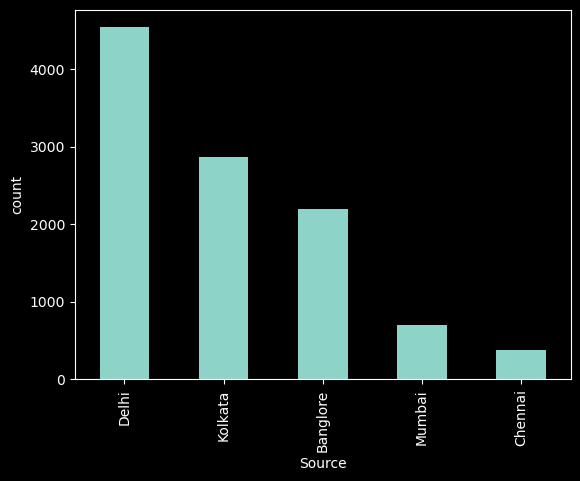

In [11]:
train_data['Source'].value_counts().plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('count')

-> This shows airport usage, or demand for flights from different locations.

## Destination

Text(0, 0.5, 'count')

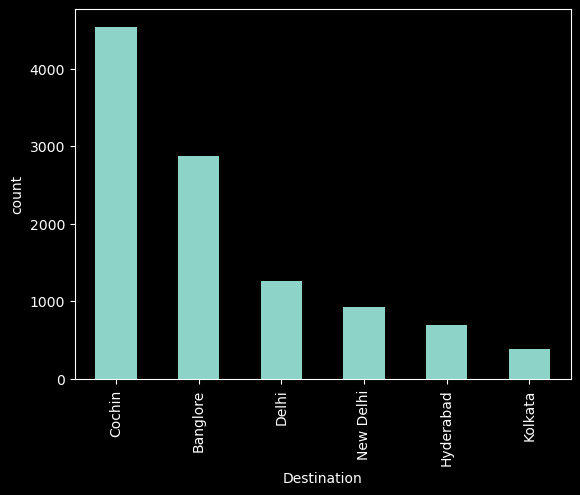

In [12]:
train_data['Destination'].value_counts().plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('count')

## Selling Price Distribution

Text(0.5, 0, 'Flight Fare')

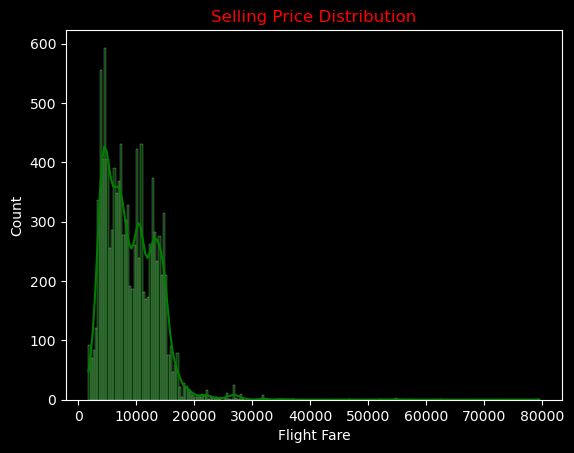

In [13]:
sns.histplot(train_data.Price, bins=200, kde=True, color = 'green')
plt.title("Selling Price Distribution",color='red')
plt.ylabel("Count")
plt.xlabel("Flight Fare")


 Most commonly, customers can buy flight tickets within the price range of 5500 to 6800

## Airlines  vs Flight Ticket Price

<function matplotlib.pyplot.show(close=None, block=None)>

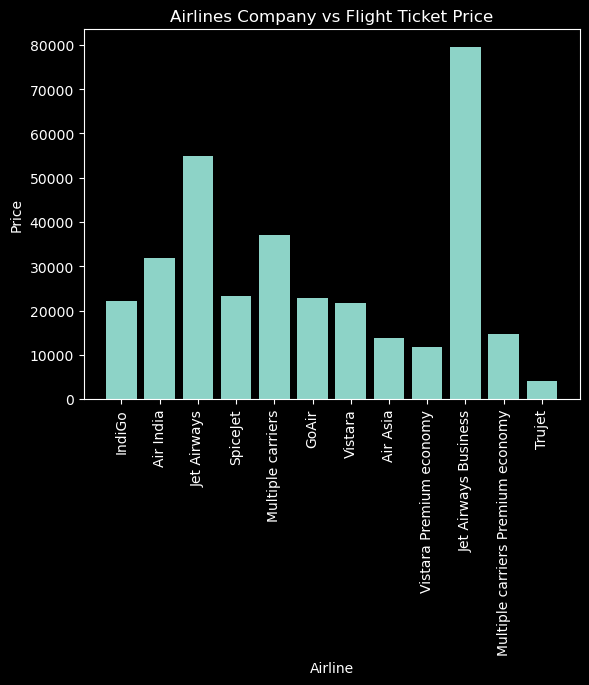

In [14]:
plt.bar(train_data['Airline'], train_data['Price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title("Airlines Company vs Flight Ticket Price")
plt.xticks(rotation=90)
plt.show

-> Jet AirWays Business flight price is higher as compared to other.

## Feature Engineering

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##  Extracting Date, Month & Day from Date_Of_Journey Features


In [16]:
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


 • Above Date ,Months and Year Have data type object so converting into int
 

• Drop original Categorical Features

In [18]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


## → Now Exatraction for Departure Time and then Drop Dep_Time

In [20]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour


train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


## → Now Extraction for Arrival_Time and then Drop Arrival Time

In [22]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## → Now Extract Hrs and Mins from Duration and then Drop Duration Feature

In [24]:

duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [25]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [26]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


-> Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins data types is int.   

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data:-

Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data.

In [29]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

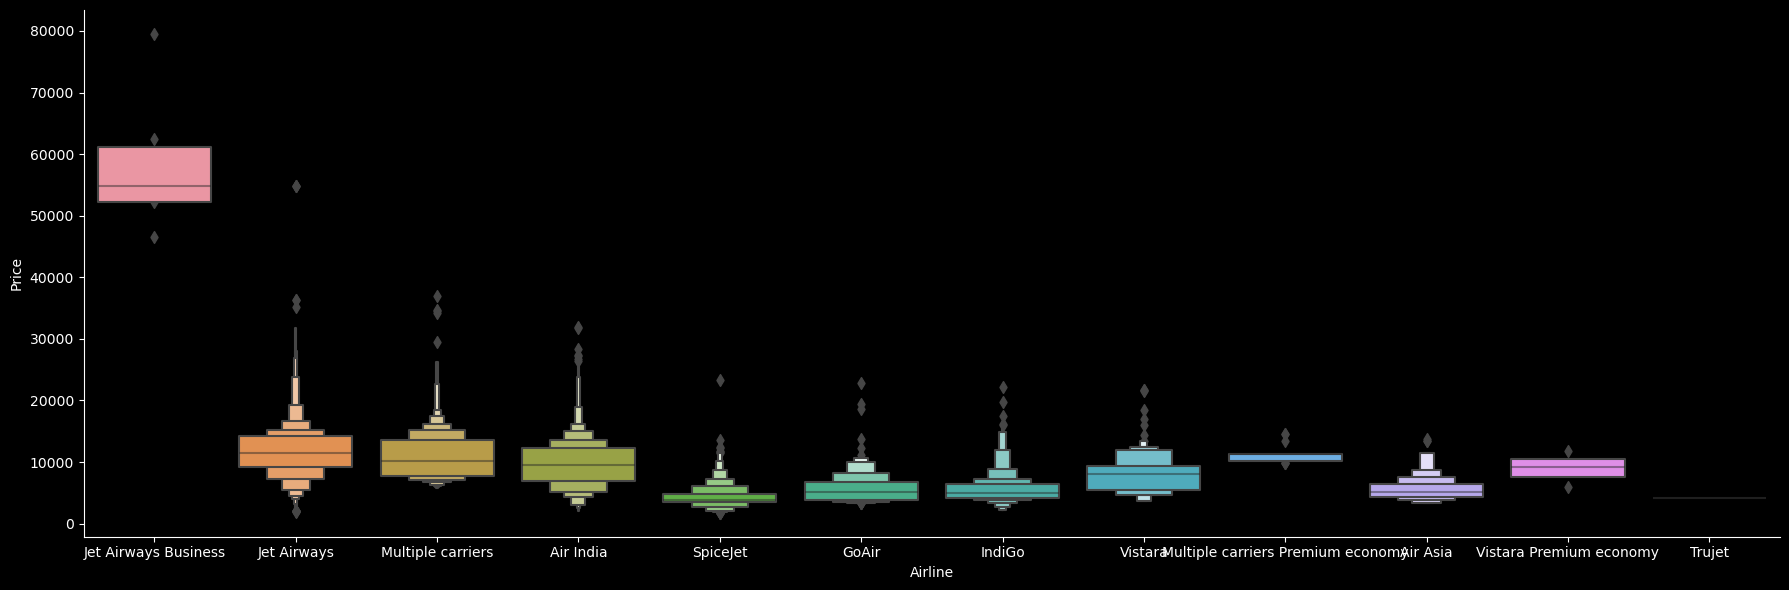

In [30]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price",ascending = False), kind="boxen", height = 6, aspect = 3)
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.show()

In [31]:
Airline = train_data[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

In [32]:
Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [33]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

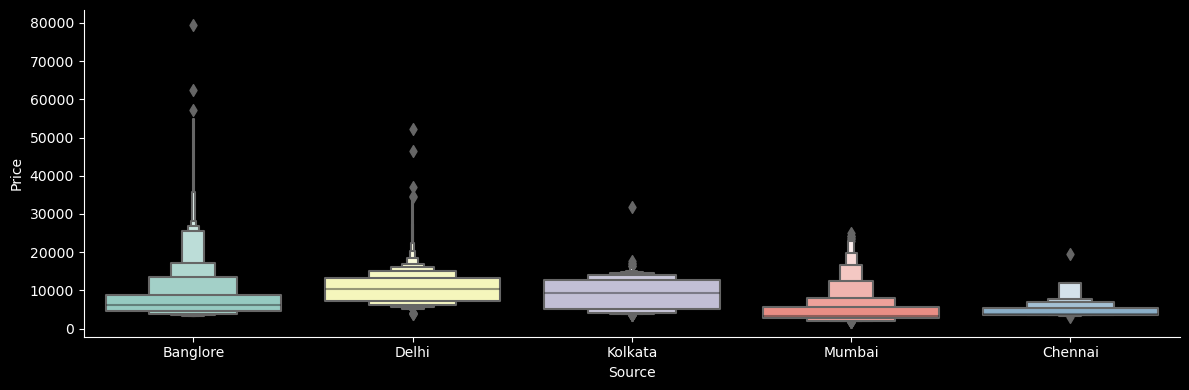

In [34]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

->  From the Above we can see that Flights Originating From Banglore has high
 flight fares as compared to other sources from where flights are originating.

In [35]:
Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = train_data[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [38]:
train_data["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [39]:
train_data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

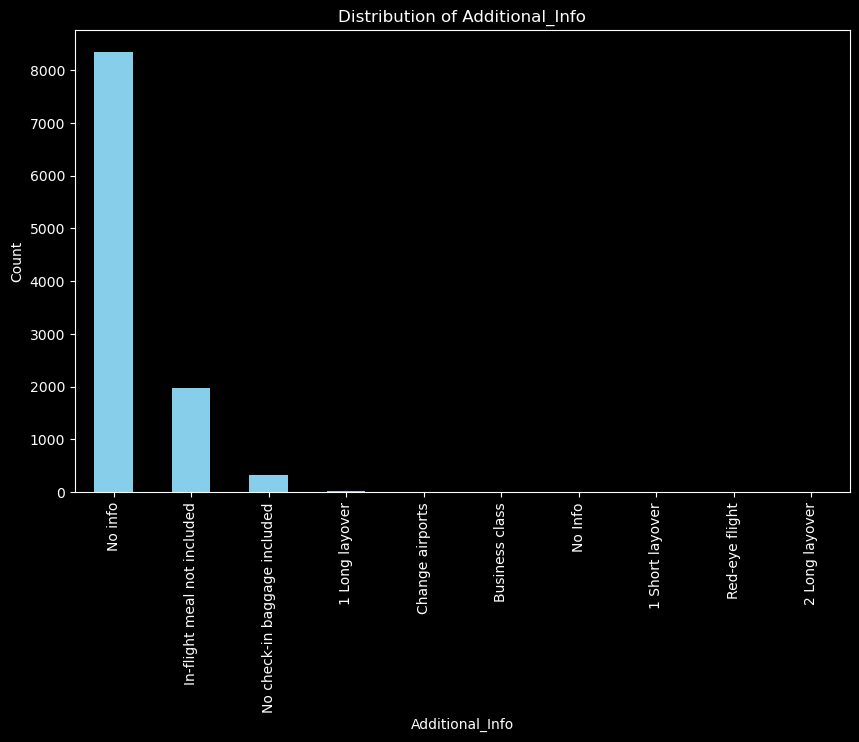

In [40]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Calculate value counts
counts = train_data['Additional_Info'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Additional_Info')
plt.ylabel('Count')
plt.title('Distribution of Additional_Info')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)

# Display the bar chart
plt.show()


-> 78% has no info in Additional_info so, we can drop that feature

->Route is realated to the Total_stops so, we can also drop it otherwise multicollinearity occurs.

In [41]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [42]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [44]:
train_data.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [45]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [46]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,1,0,0


In [47]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [48]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [49]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Total_Stops                10682 non-null  int64
 1   Price                      10682 non-null  int64
 2   Journey_day                10682 non-null  int64
 3   Journey_month              10682 non-null  int64
 4   Dep_hour                   10682 non-null  int64
 5   Dep_min                    10682 non-null  int64
 6   Arrival_hour               10682 non-null  int64
 7   Arrival_min                10682 non-null  int64
 8   Duration_hours             10682 non-null  int64
 9   Duration_mins              10682 non-null  int64
 10  Airline_Air India          10682 non-null  uint8
 11  Airline_GoAir              10682 non-null  uint8
 12  Airline_IndiGo             10682 non-null  uint8
 13  Airline_Jet Airways        10682 non-null  uint8
 14  Airline_Multiple carri

-> Here, all feature is in int datatypes so, now we select most important feature 

In [50]:
data_train.shape

(10682, 26)

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.\
Following are some of the feature selection methods:-\
1.feature_importance_\
2.VIF

In [51]:
data_train.columns.unique()

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [52]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]

In [53]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
y=data_train['Price']

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.24711296 0.14070967 0.06876032 0.03045729 0.0267454  0.03462123
 0.02597223 0.13948319 0.02183189 0.00822087 0.00212793 0.01153528
 0.09879164 0.014528   0.02283111 0.00388946 0.00536934 0.00085263
 0.02604653 0.0121231  0.01747296 0.00789935 0.02657635 0.00364521
 0.00239605]


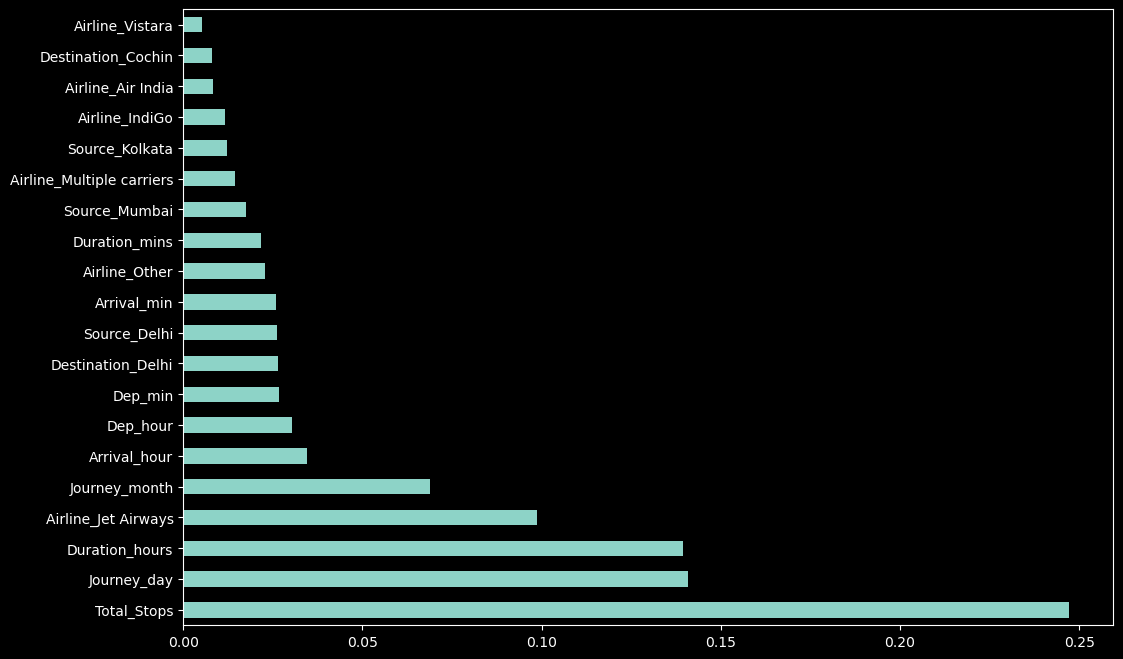

In [56]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)

feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## VIF - Multicollinearity

In [57]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [58]:
calc_vif(X)

,variables,VIF
0,Total_Stops,7.483614
1,Journey_day,3.509757
2,Journey_month,16.058719
3,Dep_hour,5.755551
4,Dep_min,2.777481
5,Arrival_hour,4.887929
6,Arrival_min,3.429245
7,Duration_hours,6.085587
8,Duration_mins,4.067779
9,Airline_Air India,5.004881


-> Drop the Source_Delhi because its VIF>10 and its features importance is less as compared to others. 

In [59]:

X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
pd.set_option('display.max_columns', None)

In [61]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Building Machine Learning Model using:-
## 1.Linear Regression
## 2.Random Forest

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)

In [67]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score test data",r2_score(y_test,y_pred))



Mean Absolute Error: 2160.3245615342375
MSE 10729795.242762867
R2 score test data 0.5023760683372585


R2 score is only 0.50 it means that it can explain only 50% of our data.

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = reg_rf.predict(X_test)

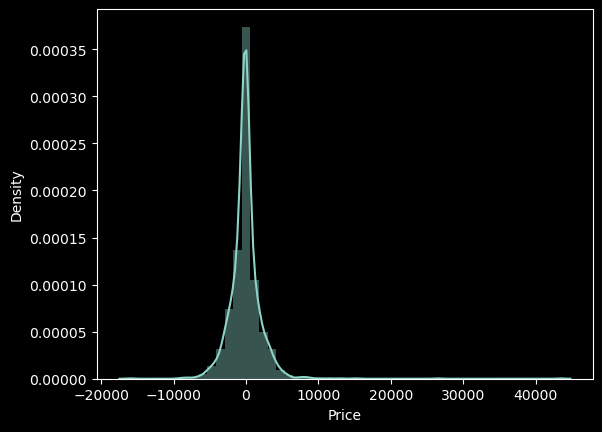

In [71]:
sns.distplot(y_test-y_pred)
plt.show()

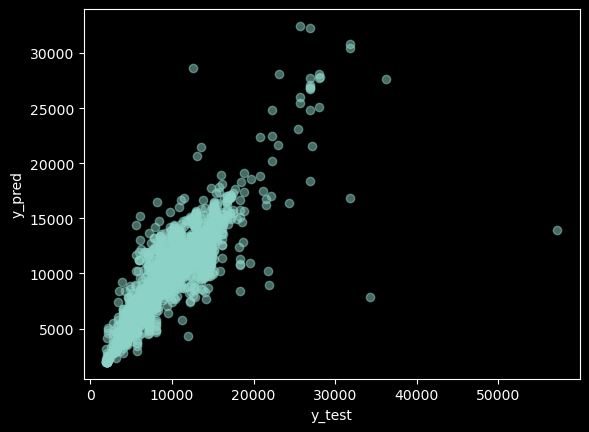

In [72]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [73]:
from sklearn import metrics

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1306.8136669376092
MSE: 5108906.282614878
RMSE: 2260.2889821027043


In [75]:
metrics.r2_score(y_test, y_pred)

0.7630603405441441